# Week 3 HW

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Visualize genetic relatedness between the strains by performing principal component analysis and plotting the first two components.

Start by doing PCA in plink. --allow-extra-chr lets command be run on non-human data

In [3]:
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pca \
  --allow-extra-chr \
  --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%

Read in eigenvectors and eigenvalues

In [4]:
vecs = pd.read_csv("plink.eigenvec", delimiter=" ", header = None)
vals = pd.read_csv("plink.eigenval", delimiter=" ", header = None)

Plot PC1 and PC2 (ie. the first and second eigenvectors.  

Text(0, 0.5, 'PC2')

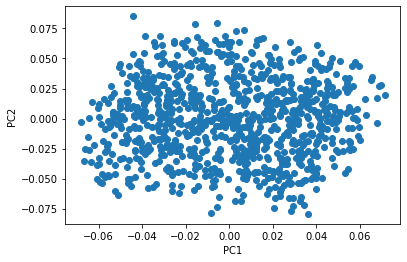

In [180]:
fig, ax = plt.subplots()
ax.scatter(x = vecs[2], y = vecs[3])
plt.xlabel('PC1')
plt.ylabel('PC2')

Something here is going wrong, but I honestly have no idea what. Data shows absolutely little clustering.

## 2. Visualize the allele frequency spectrum by plotting a histogram of allele frequencies.

First, generate file of allele frequencies using plink --freq

In [6]:
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --allow-extra-chr \
  --freq 

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --freq
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49

For some reason, I found this file an aboslute nightmare to work with using pandas. Using awk to extract the fifth column with minor allele frequencies

In [7]:
%%bash
awk '{print $5}' plink.frq > frequencies

In [8]:
freq=pd.read_csv("frequencies")
freq

,MAF
0,0.4933
1,0.4828
2,0.4793
3,0.4917
4,0.4907
...,...
16619,0.4659
16620,0.4923
16621,0.4880
16622,0.3811


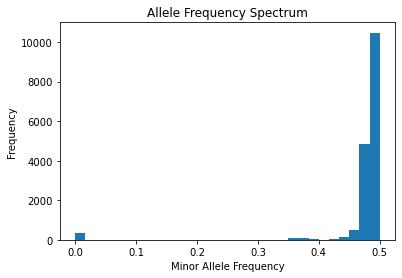

In [181]:
fig, ax = plt.subplots()
ax.hist( freq['MAF'], bins=30 )
plt.title("Allele Frequency Spectrum")
plt.xlabel('Minor Allele Frequency')
plt.ylabel('Frequency')
plt.show()

Again, something is going quite wrong. MAF should peak at 0 and then sharply decline – pretty much the opposite of what I'm getting.

## 3. Using plink, perform quantitative association testing for each phenotype. Use the top 10 principal components (eigenvectors) as covariates in your analysis, to adjust for non-independence due to relatedness.

Reformatting the phenotype data to separate IDs. 

In [182]:
%%bash 

#Reformatting 

tr "_" "\t" < BYxRM_PhenoData.txt > split_pheno.txt

Using plink with the above input file to do GWAS

In [11]:
%%bash

plink \
    --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
    --pheno split_pheno.txt \
    --linear \
    --allow-extra-chr \
    --allow-no-sex \
    --all-pheno \
    --covar plink.eigenvec \
    --covar-number 1-10

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno split_pheno.txt
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9

In [12]:
#for i in range(1,47):
# #   print("plink.P"+str(i)+".assoc.linear")

Getting names of the different phenotype columns

In [14]:
%%bash
head -n 1 BYxRM_PhenoData.txt | tr '\t' '\n' > pheno_list 

In [183]:
#get the phenotypes
pheno_df = pd.read_csv("pheno_list", header=None)
names = pheno_df[0].tolist() 
#names[23]

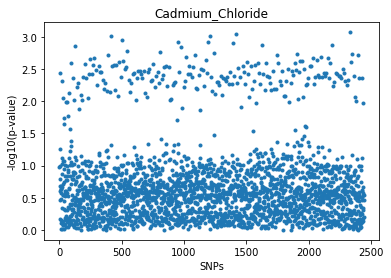

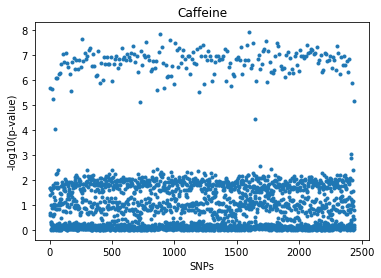

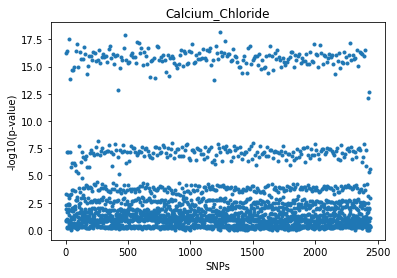

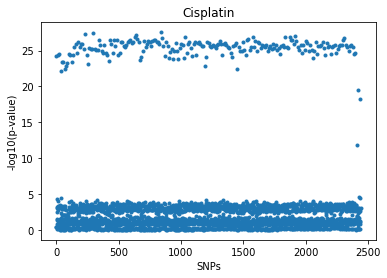

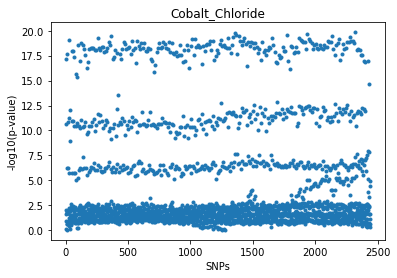

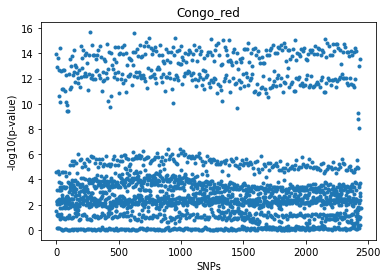

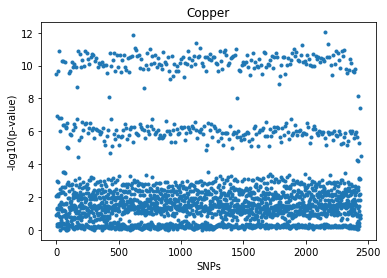

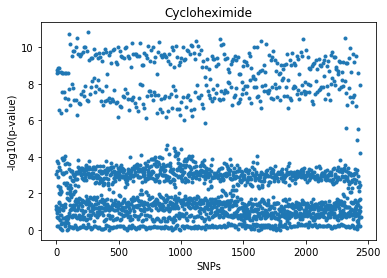

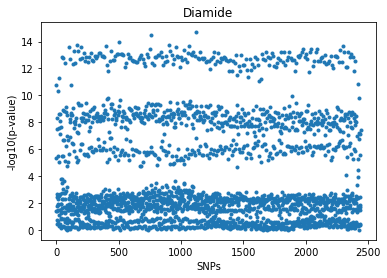

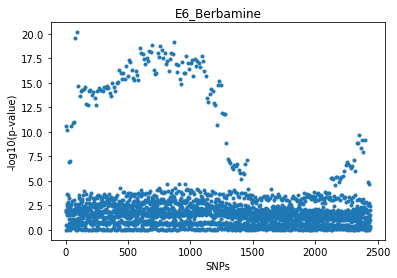

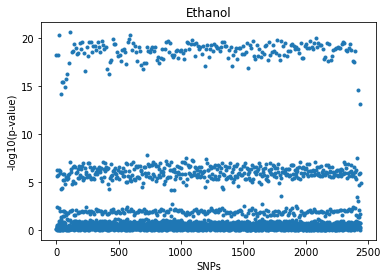

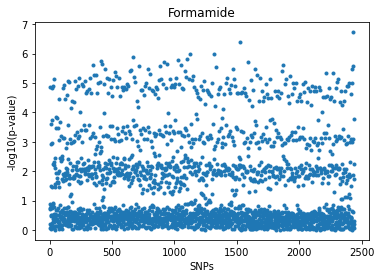

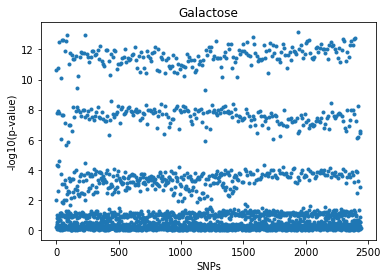

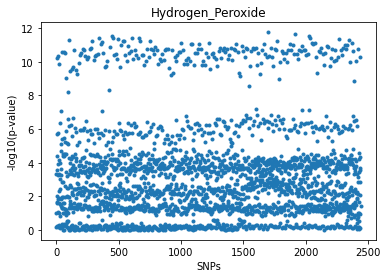

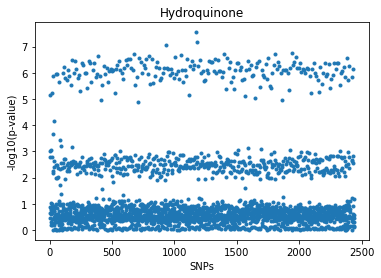

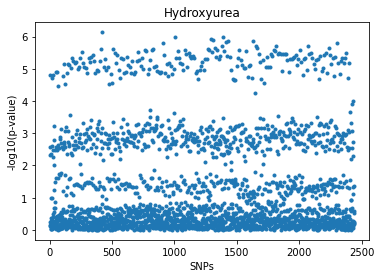

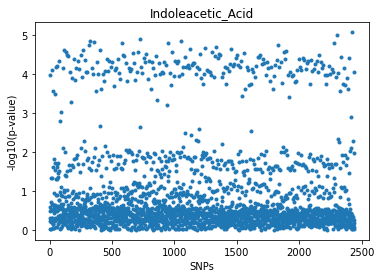

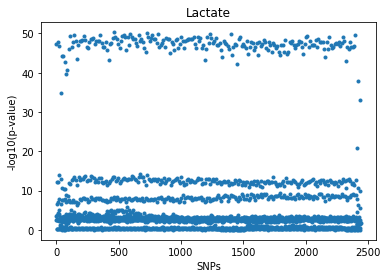

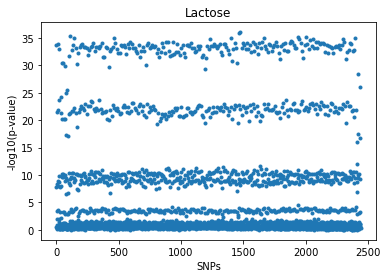

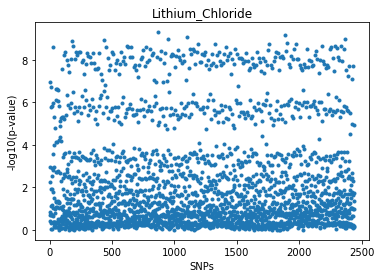

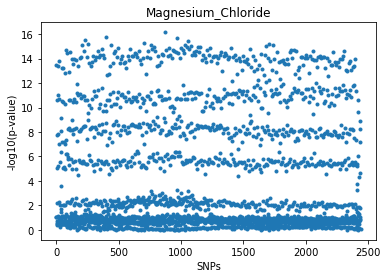

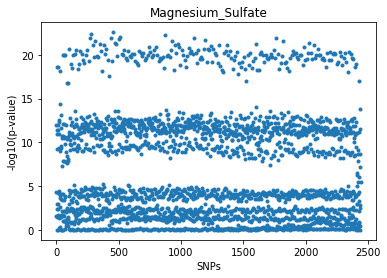

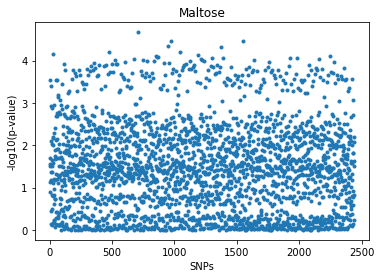

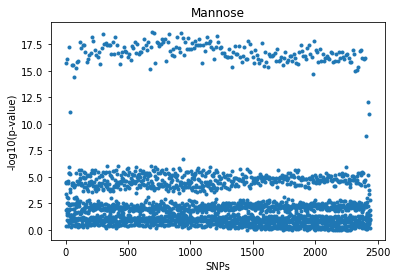

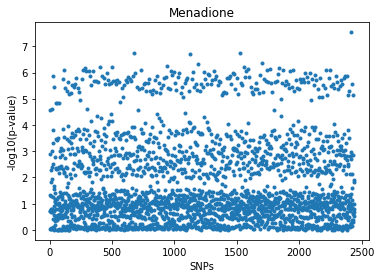

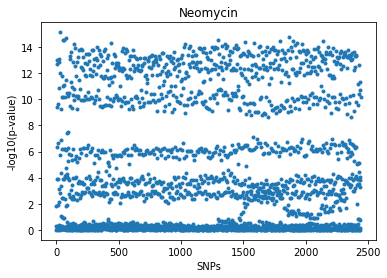

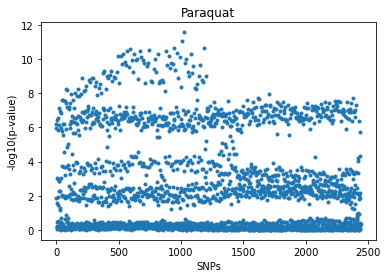

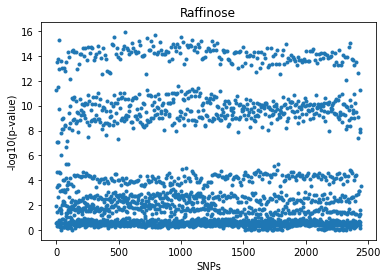

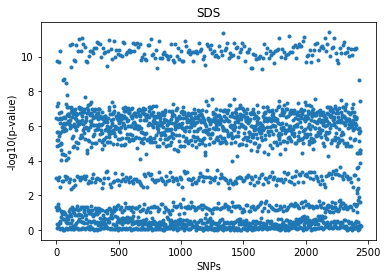

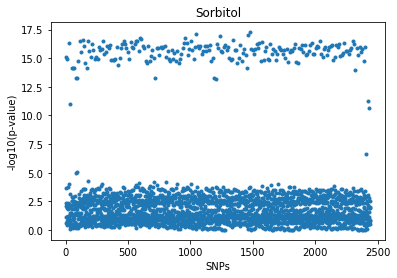

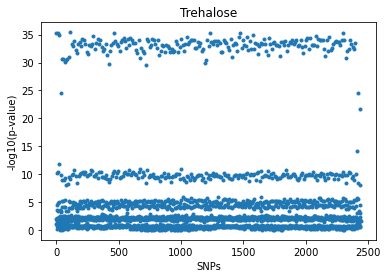

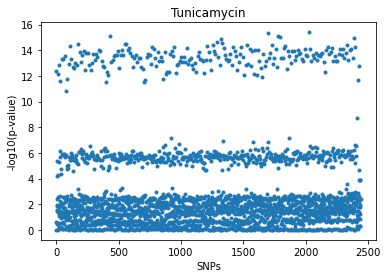

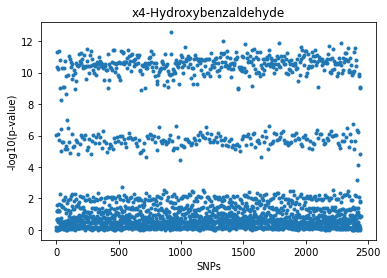

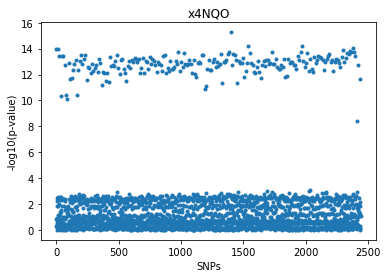

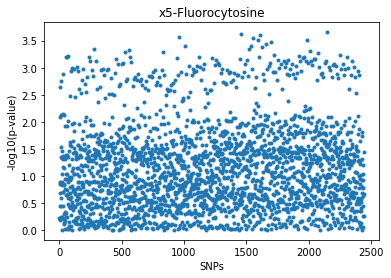

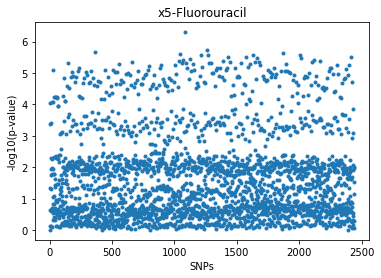

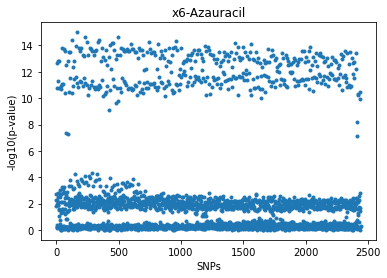

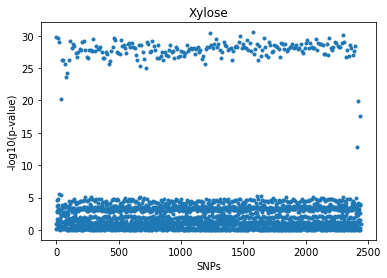

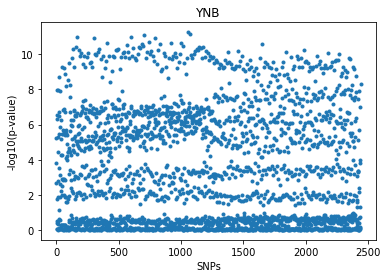

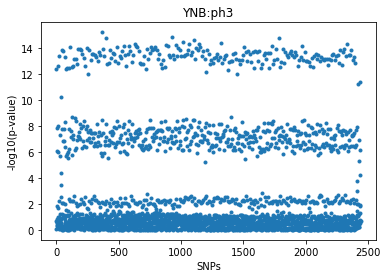

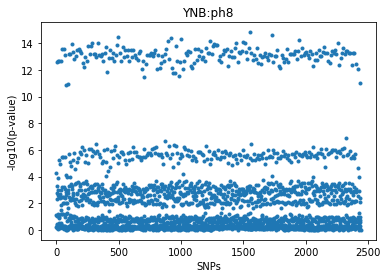

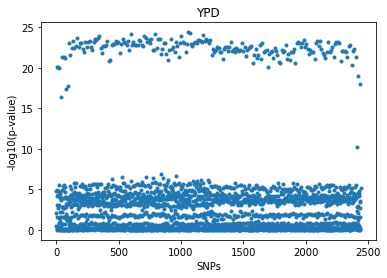

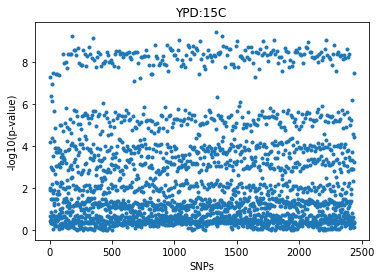

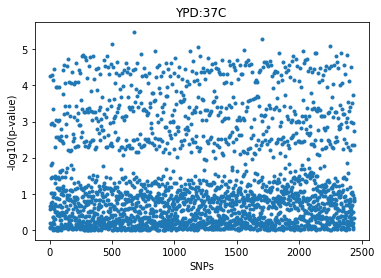

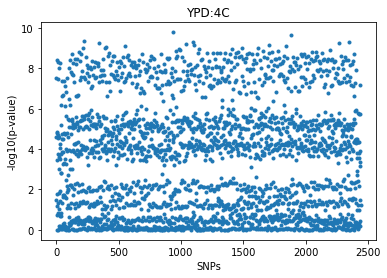

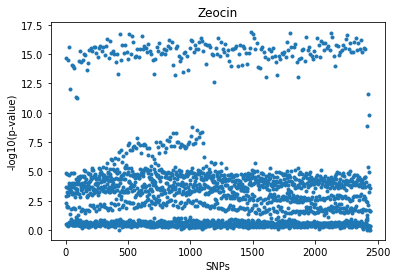

In [16]:
#Manhattan plots
for i in range(1,47):
    gwas = pd.read_csv("plink.P"+str(i)+".assoc.linear", sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    fig, ax = plt.subplots()

    for chr in ["chrI", "ChrII", "ChrIII", "ChrIV", "ChrV", "ChrVI","ChrVII","ChrVIII","ChrIX", "ChrX","ChrXi", "ChrXII",
               "ChrXIII", "ChrXIV", "ChrXV", "ChrXVI","chrM"]: 
        ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')

    plt.xlabel("SNPs")
    plt.ylabel("-log10(p-value)")
    plt.title(names[i-1])

    plt.show()

In [ ]:
##qq

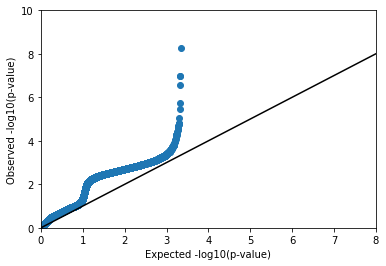

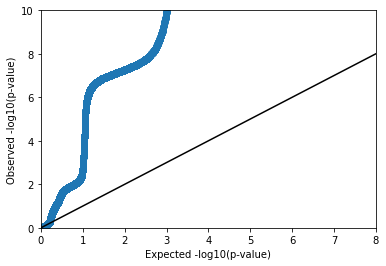

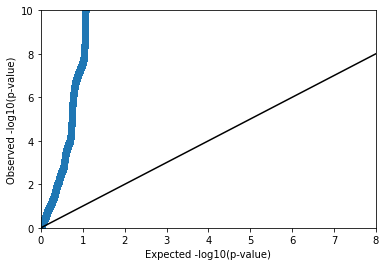

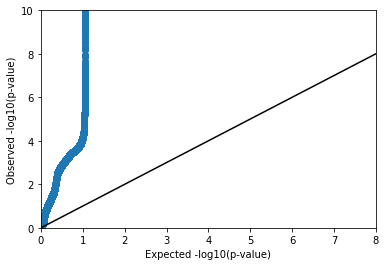

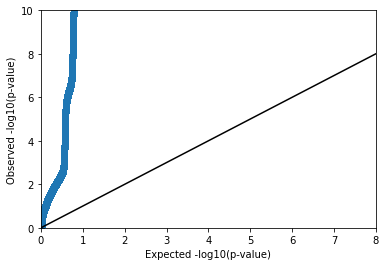

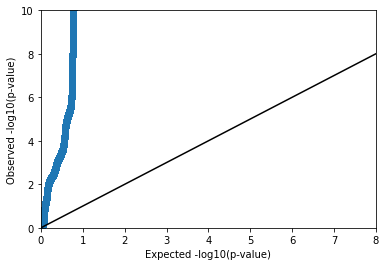

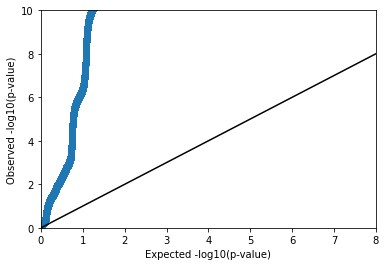

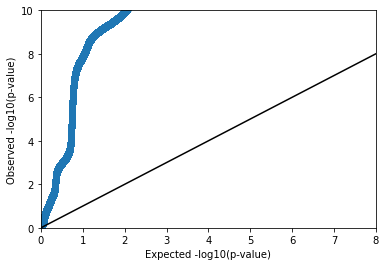

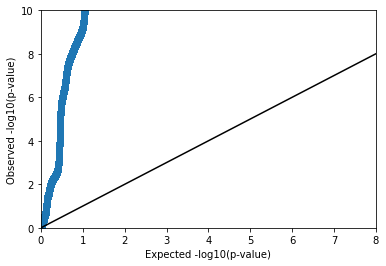

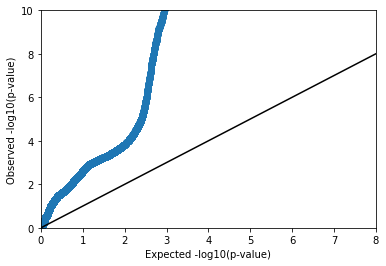

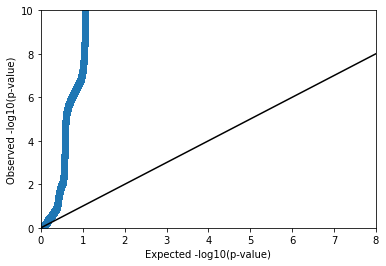

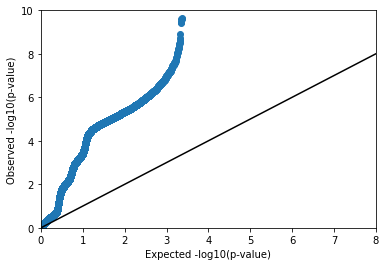

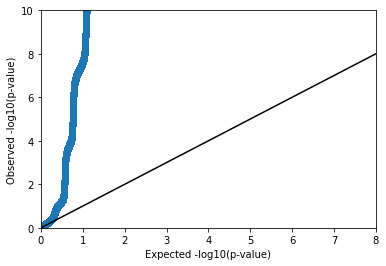

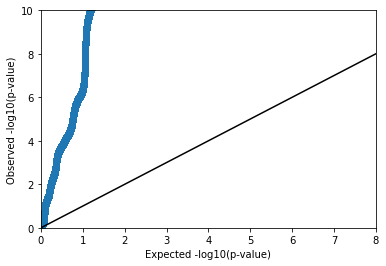

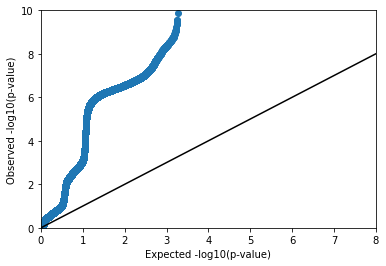

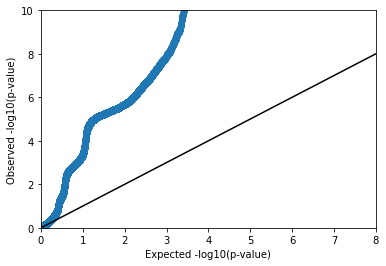

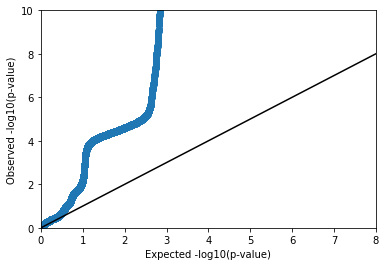

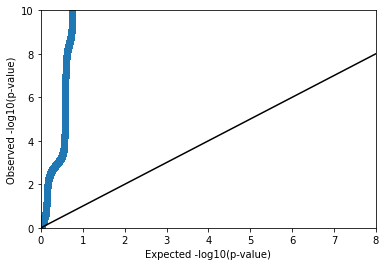

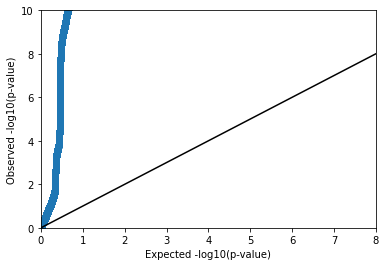

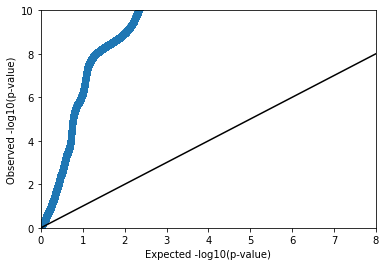

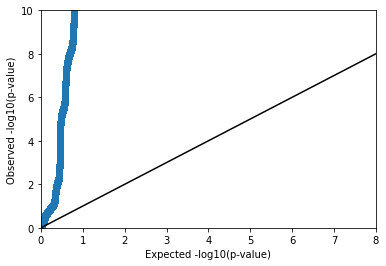

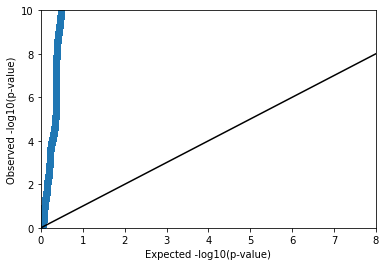

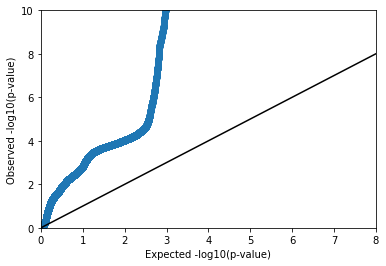

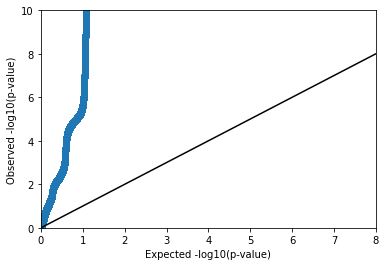

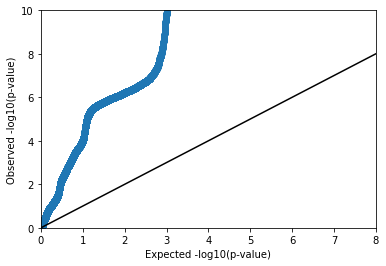

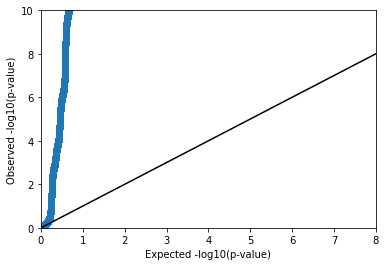

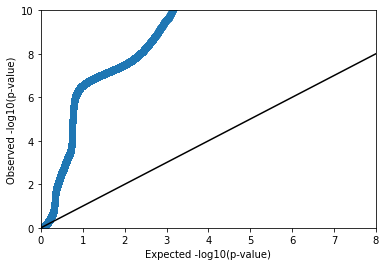

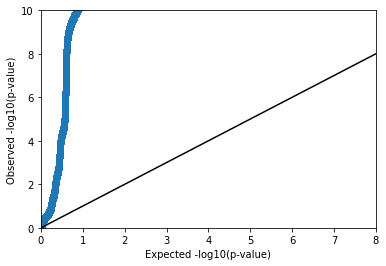

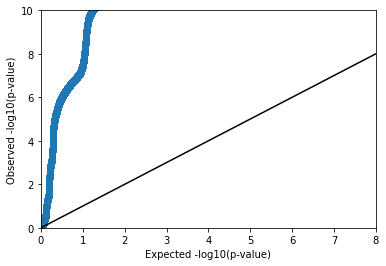

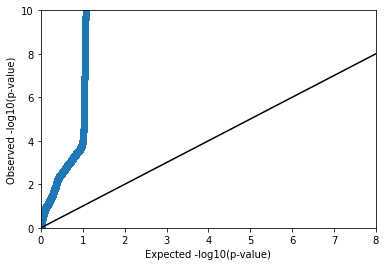

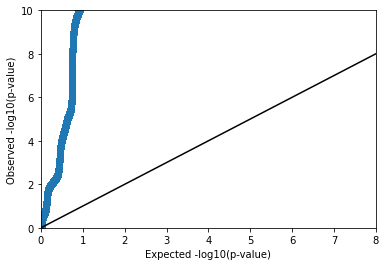

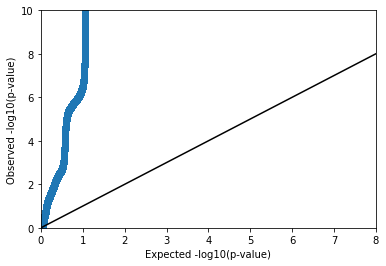

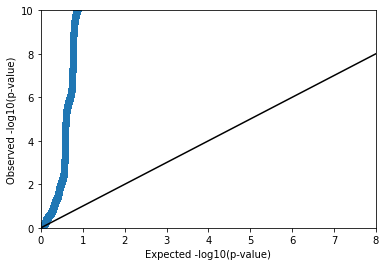

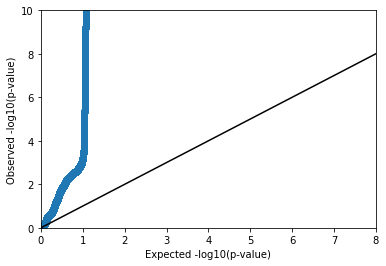

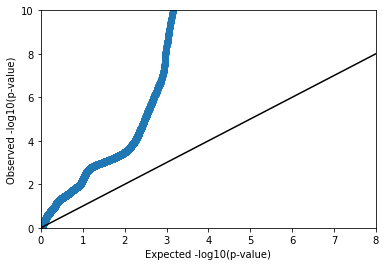

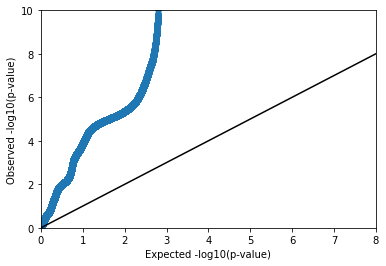

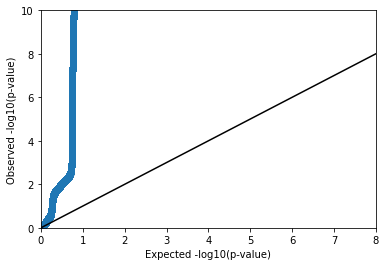

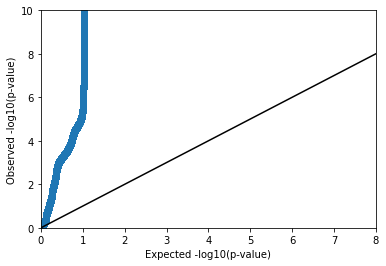

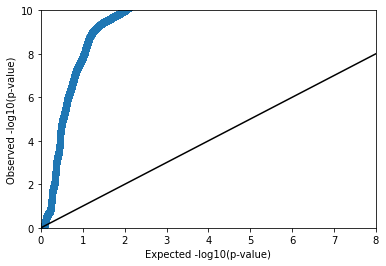

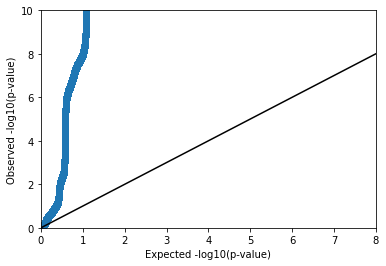

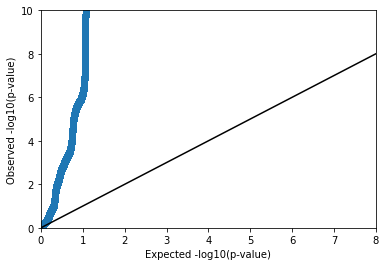

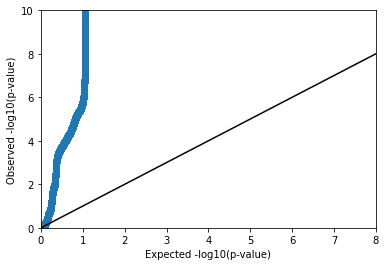

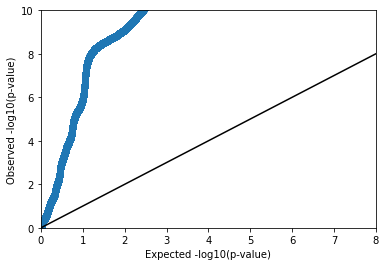

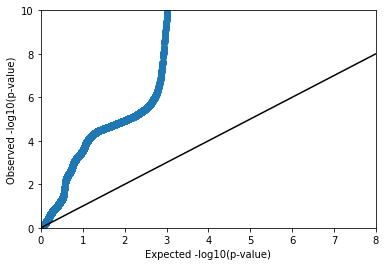

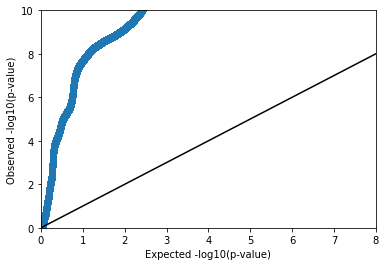

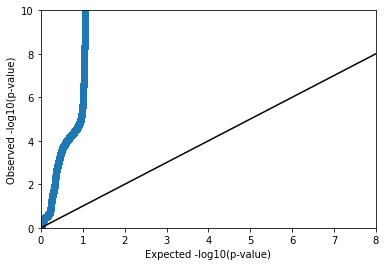

In [18]:
for i in range(1,47):
    gwas = pd.read_csv("plink.P"+str(i)+".assoc.linear", sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))

    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    gwas['snp_index'] = range(len(gwas))

    fig, ax = plt.subplots()

    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    plt.show()

Once again, something is going quite wrong here. These QQ plots should (for most of their range) lie pretty close to the line of expected p-values.

### 5. Choose one of the traits for which you performed GWAS. For the top associated SNP, visualize the effect size by creating a boxplot of the phenotype stratified by genotype.

In [23]:
#For Mannose (P24), first sort by P value and find the most significant SNP
gwas = pd.read_csv("plink.P24.assoc.linear", sep = "\s+")
gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))

gwas_sorted = gwas.sort_values(by = "P")
gwas_sorted.head(1)

# This is at BP 439785

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
163693,chrXV,.,439785,G,COV2,873,13.66,9.846,9.559000e-22,21.019588,163693


In [87]:
%%bash
# Now, find the corresponding row in original dataset
head -n 28 BYxRM_segs_saccer3.bam.simplified.vcf | tail -n 1 > goi
grep 439785 BYxRM_segs_saccer3.bam.simplified.vcf > goi2
cat goi goi2 > goi3

In [125]:
#Read in to pandas
goi = pd.read_csv("goi3", sep = "\s+")

# Separate the dataset based on genotype of this snp
samples_0_1 = []
samples_0_0 = []
samples_1_1 = []

for column in goi.columns[9::]:
    if goi.iloc[0, :][column][0:3] == "0/0":
        samples_0_0.append(column)
    elif goi.iloc[0, :][column][0:3] == "0/1":
        samples_0_1.append(column)
    elif goi.iloc[0, :][column][0:3] == "1/1":
        samples_1_1.append(column)

In [166]:
# Read in phenotype data
pheno_data = pd.read_csv("BYxRM_PhenoData.txt", sep='\t')
pheno_of_interest=pheno_data[["Unnamed: 0", "Mannose"]]
pheno_of_interest = pheno_of_interest.set_index("Unnamed: 0") 
#pheno_data["Mannose"]
# Separate data based on genotype
data_0_1 = []
data_0_0 = []
data_1_1 = []
for i in samples_0_1:
    if i in list(pheno_of_interest.index) :
        data_0_1.append(pheno_of_interest.loc[i, "Mannose"])
for i in samples_0_0:
    if i in list(pheno_of_interest.index) :
        data_0_0.append(pheno_of_interest.loc[i, "Mannose"])
for i in samples_1_1:
    if i in list(pheno_of_interest.index) :
        data_1_1.append(pheno_of_interest.loc[i, "Mannose"])

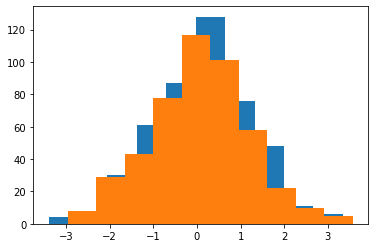

In [177]:
fig, ax = plt.subplots()
plt.hist(data_0_0)
#plt.hist(data_0_1)
plt.hist(data_1_1)

plt.show()

Once again, something is not right at all. From this, it seems like the greatest-effect allele has pretty much no effect. One would expect the histograms to look at least a bit different. 